In [34]:
# from dataset.Norm2dDataset import Norm2dDataset, Norm2dParameter
from dataset.timeseriesToyDataset.timeSeriesDataset import timeSeriesDataset
from sklearn.linear_model import LogisticRegression
from evaluator.visualize import joinplot
import seaborn as sns
import matplotlib.pyplot as plt
from models.logistic_regression import LogisticRegression
import warnings
warnings.simplefilter("ignore")
import polars as pl

# create dataset

# modeling

## 完全分離

<Axes: xlabel='x', ylabel='Probability'>

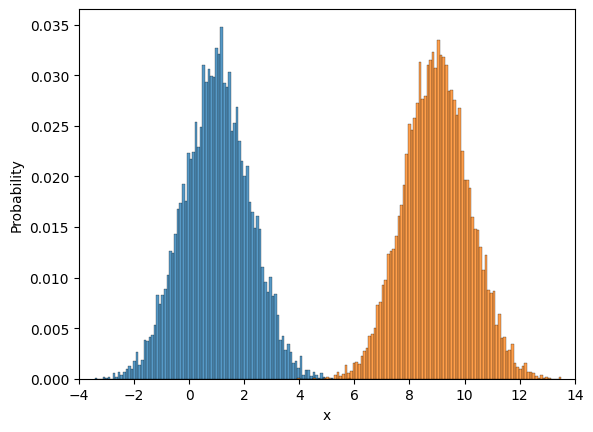

In [116]:
param1 =  {"slope":0, "intercept": 9, "noize":1.5, "size":10000}
param2 =  {"slope":0, "intercept": 1, "noize":1.5, "size":10000}
dataset = timeSeriesDataset((param1, param2))
plt.xlim([-4, 14])
sns.histplot(dataset.data.filter(pl.col("y")==1),x = "x", bins= 100, stat ="probability", color = '#1f77b4')
sns.histplot(dataset.data.filter(pl.col("y")==0),x = "x", bins= 100, stat ="probability", color= "#ff7f0e")

<Axes: xlabel='x', ylabel='rprob'>

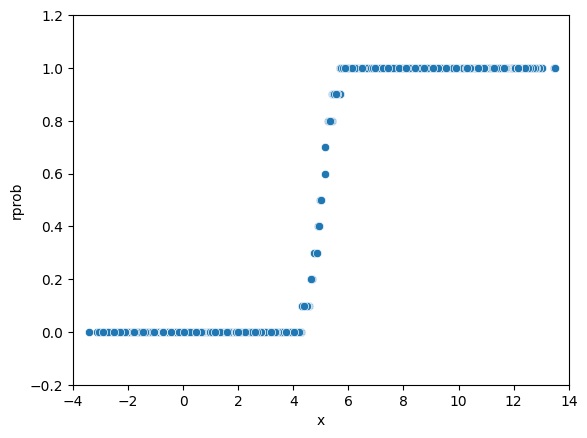

In [117]:
param = {"penalty":"l2"}
model = LogisticRegression(param)
model.train(dataset.X, dataset.Y)
dataset["rprob"] = 1 - model.predict_proba(dataset.X)[:,1].round(1)
plt.xlim([-4, 14])
plt.ylim([-0.2, 1.2])
sns.scatterplot(dataset.data, x='x', y = 'rprob')

In [123]:
(dataset["rprob"]/(1-dataset["rprob"]).clip(lower_bound = 0.0001, upper_bound = 2)).alias("hoge").mea

hoge
f64
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0
10000.0


<Axes: xlabel='x', ylabel='Probability'>

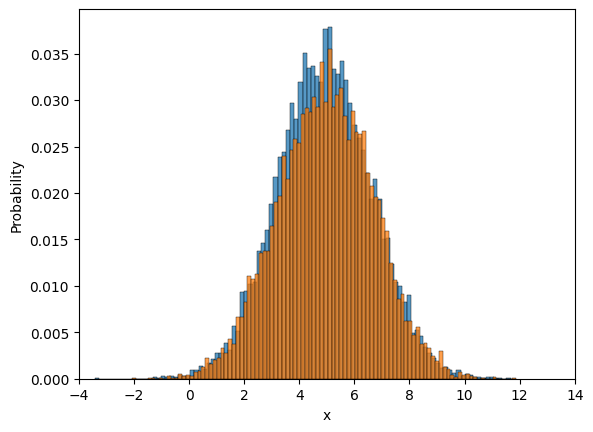

In [107]:
param1 =  {"slope":0, "intercept": 5, "noize":3, "size":10000}
param2 =  {"slope":0, "intercept": 4.9, "noize":3, "size":10000}
dataset = timeSeriesDataset((param1, param2))
plt.xlim([-4, 14])
sns.histplot(dataset.data.filter(pl.col("y")==1),x = "x", bins= 100, stat ="probability", color = '#1f77b4')
sns.histplot(dataset.data.filter(pl.col("y")==0),x = "x", bins= 100, stat ="probability", color= "#ff7f0e")

<Axes: xlabel='x', ylabel='rprob'>

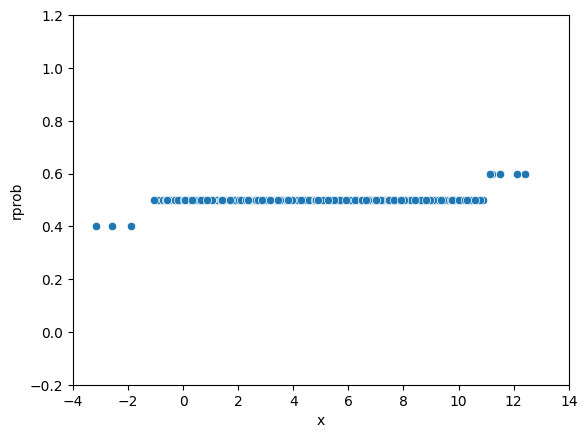

In [106]:
param = {"penalty":"l2"}
model = LogisticRegression(param)
model.train(dataset.X, dataset.Y)
dataset["rprob"] = 1 - model.predict_proba(dataset.X)[:,1].round(1)
plt.xlim([-4, 14])
plt.ylim([-0.2, 1.2])
sns.scatterplot(dataset.data, x='x', y = 'rprob')